## Cardiovascular Risk Prediction 
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. 
- The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). 
- The dataset provides the patients’ information. 
- It includes over 4,000 records and 15 attributes.

#### Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

### Data Description
Demographic:
-  Sex: male or female("M" or "F")
-  Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
-  is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
-  Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
-  BP Meds: whether or not the patient was on blood pressure medication (Nominal)
-  Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
-  Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
-  Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
-  Tot Chol: total cholesterol level (Continuous)
-  Sys BP: systolic blood pressure (Continuous)
-  Dia BP: diastolic blood pressure (Continuous)
-  BMI: Body Mass Index (Continuous)
-  Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
-  Glucose: glucose level (Continuous)
Predict variable (desired target)
-  10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [280]:
pip install scikit-plot

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scikitplot as skplt
import warnings
# help(warnings)
warnings.filterwarnings(action='ignore')

In [6]:
df = pd.read_csv('data_cardiovascular_risk.csv')

In [7]:
df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

In [8]:
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [10]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [11]:
#Calculating the percentage of null values
df.isnull().sum()/df['id'].count() * 100

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

<AxesSubplot:xlabel='education', ylabel='count'>

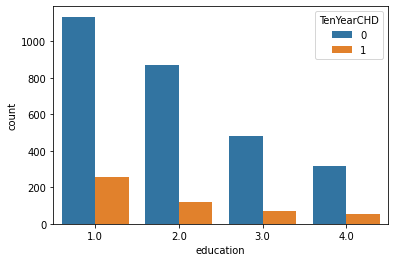

In [12]:
#Number of CHD diseases based on the level of education 
sns.countplot(data=df, x='education', hue='TenYearCHD')

<AxesSubplot:xlabel='is_smoking', ylabel='count'>

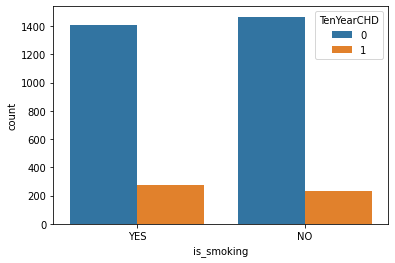

In [13]:
# CHD among the people who smoke and the ones who don't 
sns.countplot(data=df, x='is_smoking', hue='TenYearCHD')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0'),
  Text(21, 0, '23.0'),
  Text(22, 0, '25.0'),
  Text(23, 0, '30.0'),
  Text(24, 0, '35.0'),
  Text(25, 0, '38.0'),
  Text(26, 0, '40.0'),
  Text(27, 0, '43.0'),
  Text(28, 0, '45.0'),
  Text(29, 0, '50.0'),
  Text(30, 0, '60.0'),
  Text(31, 0, '70.0')])

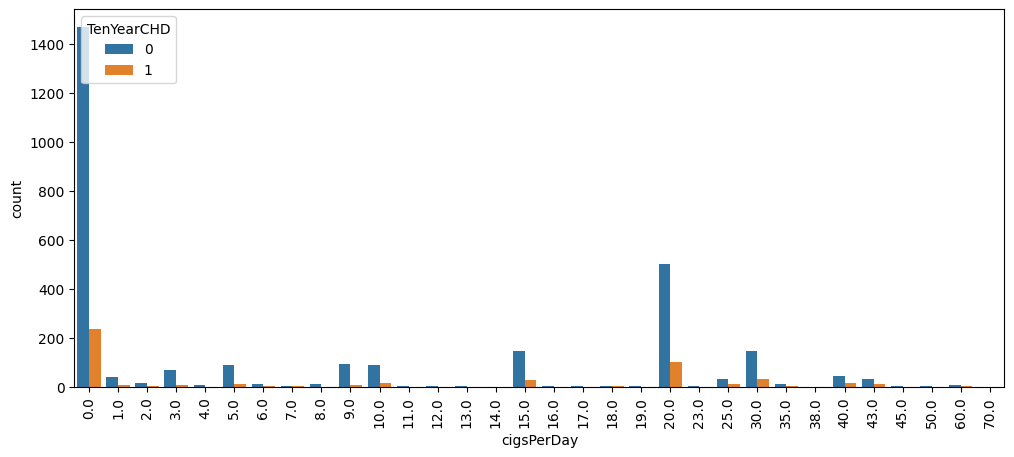

In [14]:
#cigsPerDay       
plt.figure(figsize=(12,5), dpi=100)
sns.countplot(data=df, x='cigsPerDay', hue='TenYearCHD')
plt.xticks(rotation=90)

<AxesSubplot:xlabel='BPMeds', ylabel='count'>

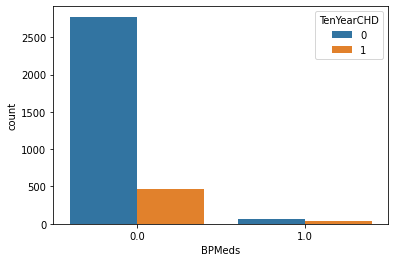

In [15]:
# tenyearCHD among people who were on BPmeds 
sns.countplot(data=df, x='BPMeds', hue='TenYearCHD')

(-0.5, 1.5)

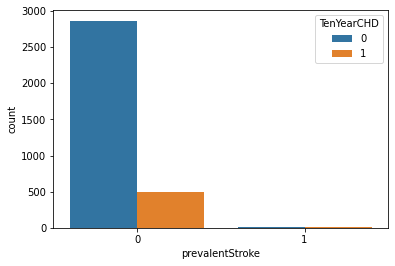

In [16]:
# Prevelent stroke means whether the patient had an stroke earlier and their chances of happening CHD
sns.countplot(data=df, x='prevalentStroke', hue='TenYearCHD')
plt.xlim()

<AxesSubplot:xlabel='prevalentHyp', ylabel='count'>

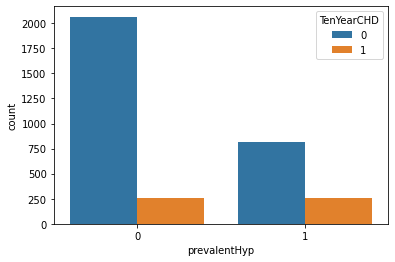

In [17]:
#PrevelentHype means whether the patient was hypertensive and their chances of happening CHD
sns.countplot(data=df, x='prevalentHyp', hue='TenYearCHD')

<AxesSubplot:xlabel='age', ylabel='count'>

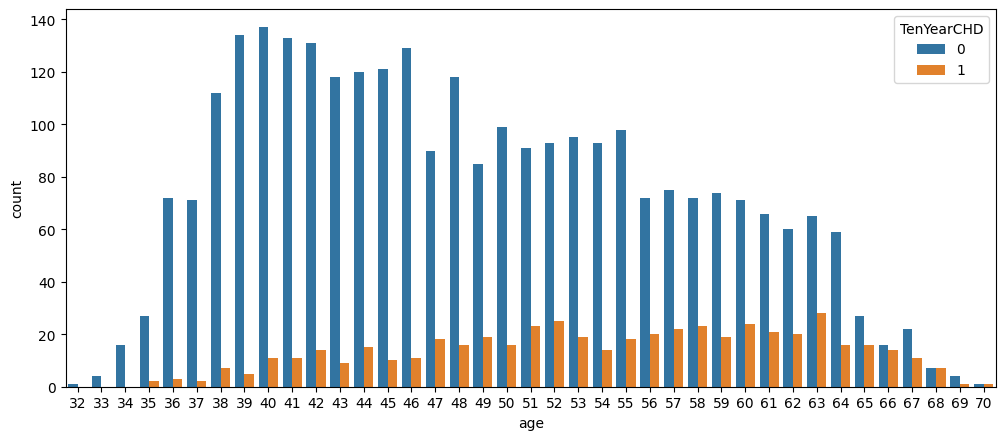

In [18]:
# Chances of CHD with respect to age 
plt.figure(figsize=(12,5), dpi=100)
sns.countplot(data=df, x='age', hue='TenYearCHD')
#plt.xticks(rotation=60)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

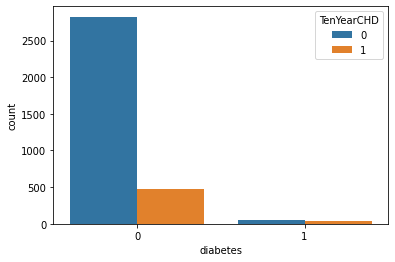

In [19]:
#Chances of CHD for a diabetic patient 
sns.countplot(data=df, x='diabetes', hue='TenYearCHD')

In [20]:
#Cardiovascular Risk Man vs Women
sns.countplot(data=df1, x='sex', hue='TenYearCHD')

NameError: name 'df1' is not defined

In [ ]:
# Checking relation among all the columns once to do further analysis 
sns.pairplot(data=df.drop(('id'), axis=1))

In [ ]:
#CHD chances with respect to heartrate
plt.figure(figsize=(16,5), dpi=100)
sns.countplot(data=df, x='heartRate', hue='TenYearCHD')
plt.xticks(rotation=90);

In [ ]:
df.isnull().sum()

In [ ]:
#CHD chances with the glucose level
plt.figure(figsize=(20,5), dpi=100)
sns.countplot(data=df, x='glucose', hue='TenYearCHD')
plt.xticks(rotation=90);

## Multivariate analysis 

In [21]:
# Dropping the id columnn as it is useless 
df1=df.drop('id', axis=1)

<AxesSubplot:>

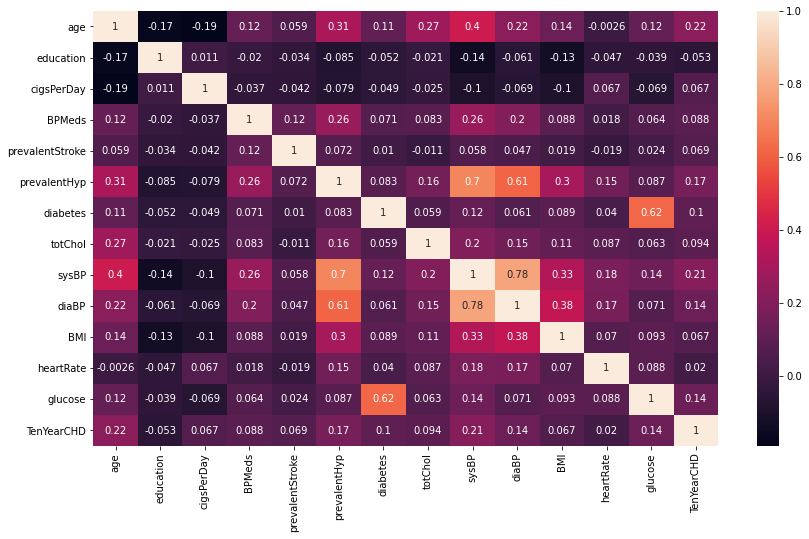

In [36]:
# Checking multicollinearity 
plt.figure(figsize=(14,8))
sns.heatmap(df1.corr(), annot=True,)

Text(0.5, 1.0, 'BMI vs age')

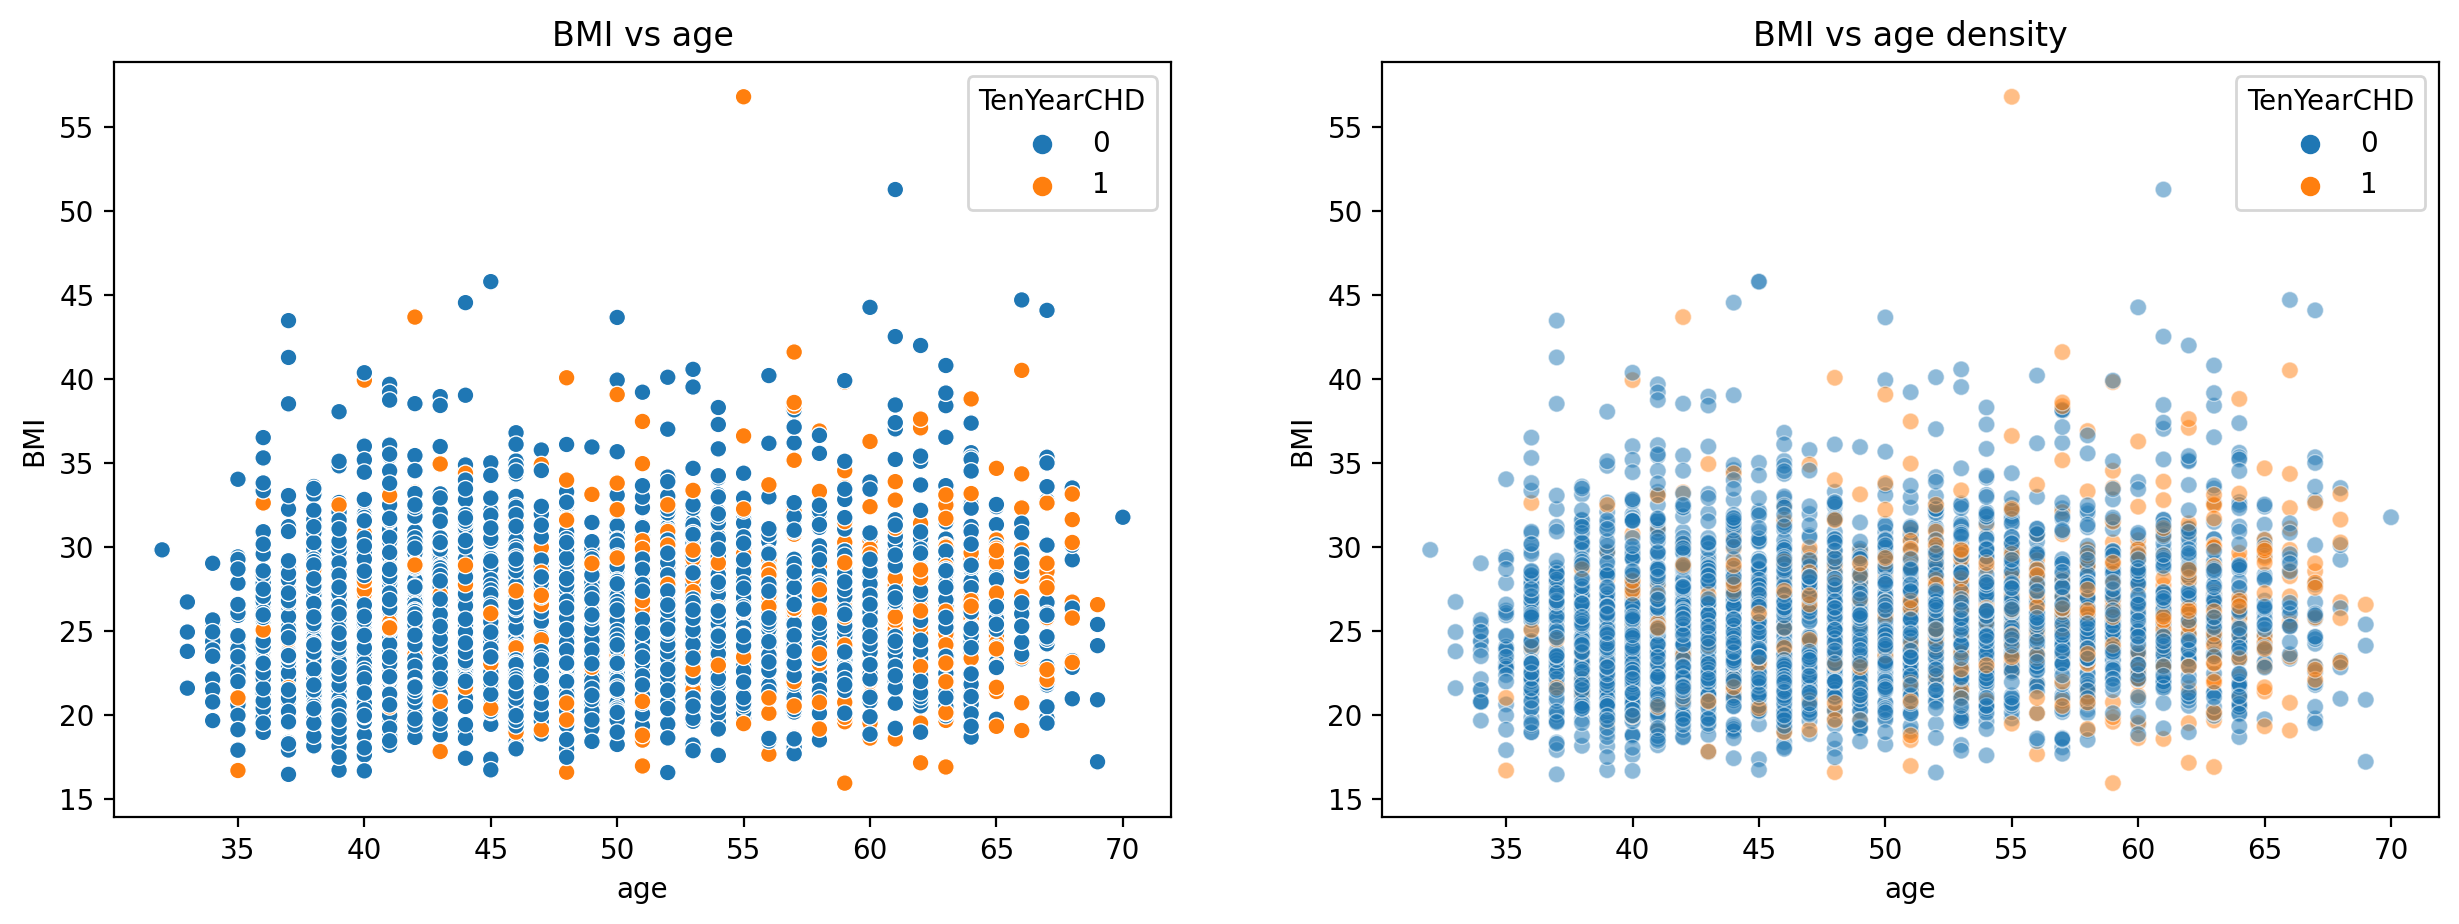

In [23]:
# BMI vs age and chances of CHD
figure, ax = plt.subplots(nrows=1 ,ncols=2, figsize=(15,5), dpi=200)
sns.scatterplot(data=df1, x='age', y='BMI', hue='TenYearCHD',ax=ax[0])
sns.scatterplot(data=df1, x='age', y='BMI', hue='TenYearCHD', alpha=0.5, ax=ax[1])
plt.title('BMI vs age density')
ax[0].set_title('BMI vs age')

<AxesSubplot:title={'center':' Age vs Diabetic desnsity'}, xlabel='diabetes', ylabel='age'>

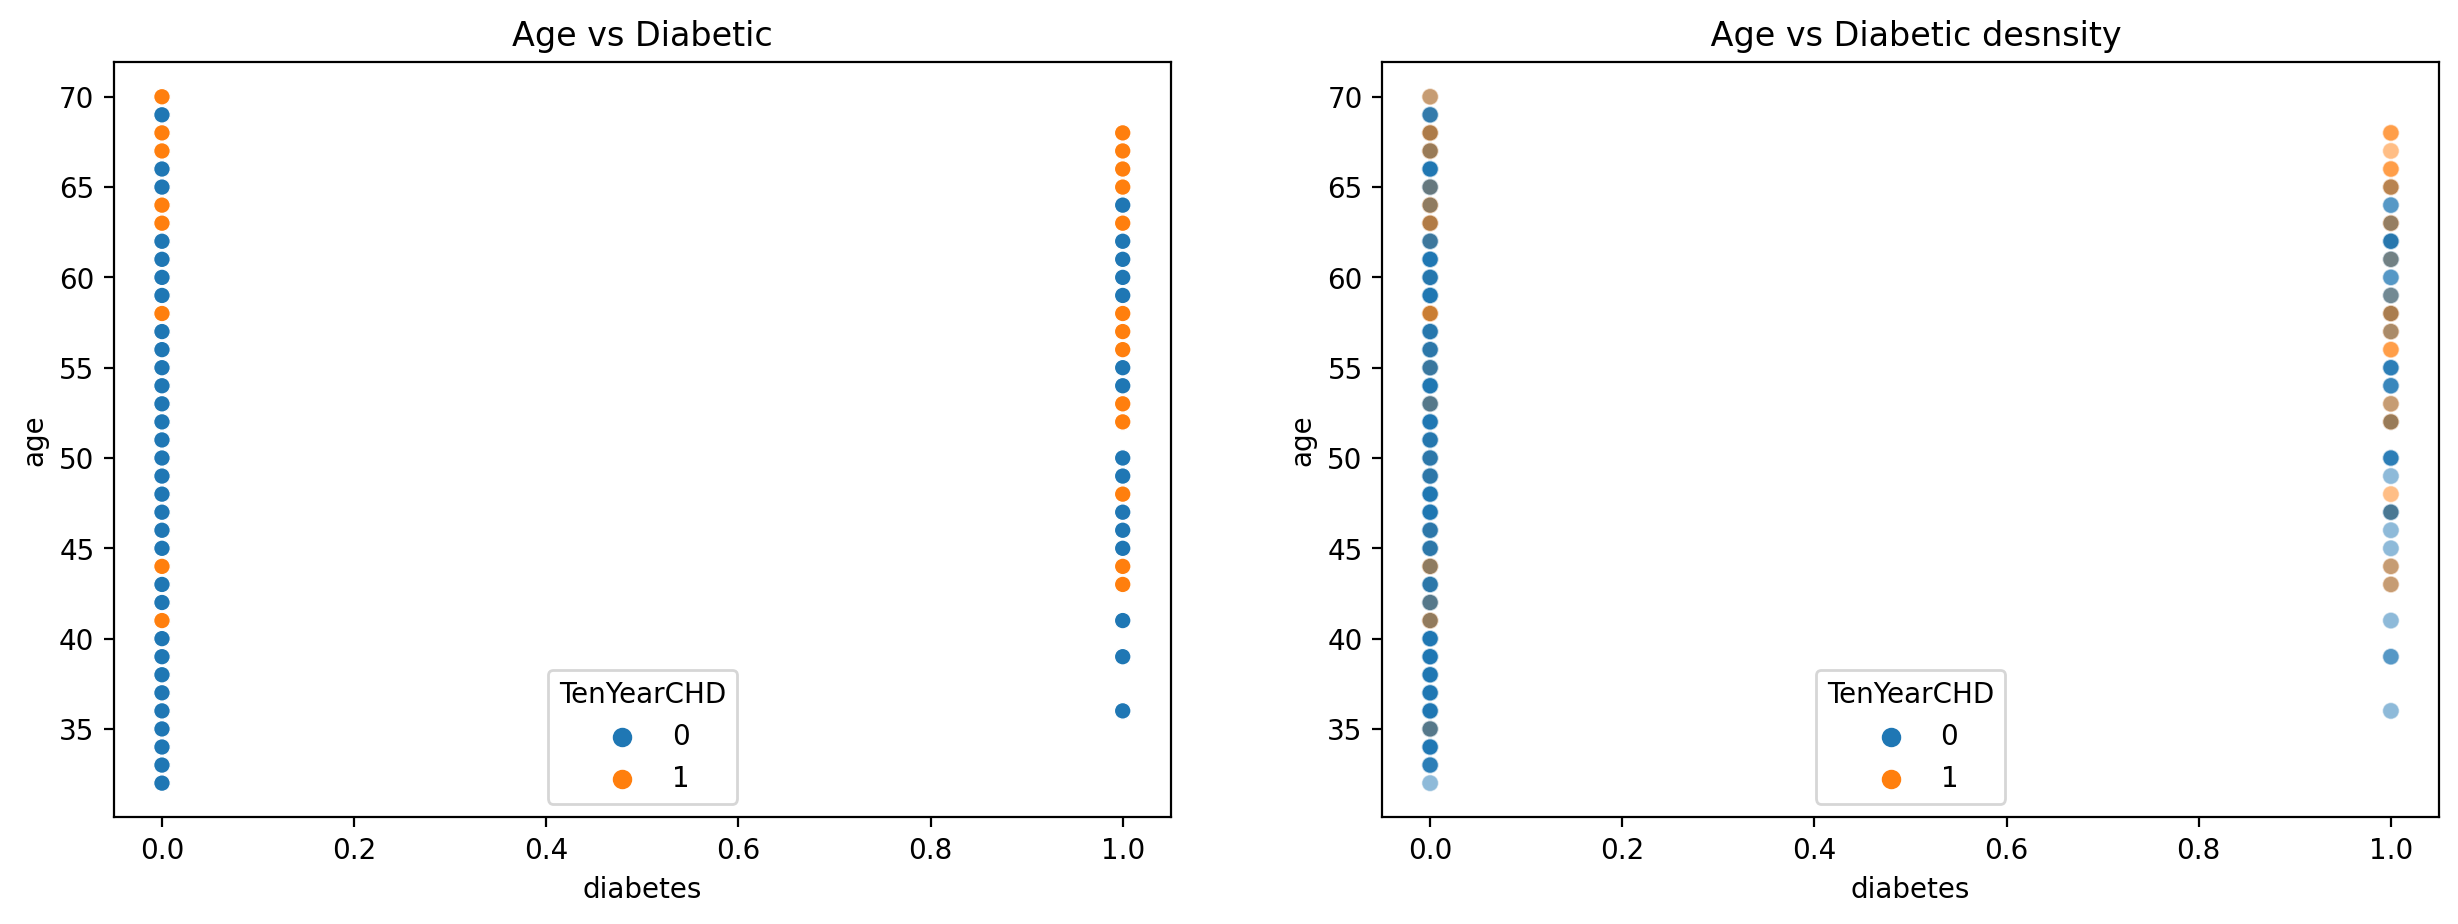

In [32]:
# CHD chances for diabetic vs non diabetic patient 
figure, ax = plt.subplots(nrows=1 ,ncols=2, figsize=(15,5), dpi=200)
# plt.figure(dpi=100)
ax[0].set_title('Age vs Diabetic')
sns.scatterplot(data=df1, x='diabetes', y='age', hue='TenYearCHD', ax=ax[0])
ax[1].set_title(' Age vs Diabetic desnsity')
sns.scatterplot(data=df1, x='diabetes', y='age', hue='TenYearCHD', ax=ax[1], alpha=0.5)

In [25]:
# No of diabetic and non diabetic patient 
df['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

In [26]:
pd.DataFrame(df1.groupby('diabetes')['TenYearCHD'].value_counts())

TenYearCHD
diabetes TenYearCHD            
0        0                 2825
         1                  478
1        0                   54
         1                   33

<AxesSubplot:title={'center':'Systolic BP vs diastolic BP density'}, xlabel='diaBP', ylabel='sysBP'>

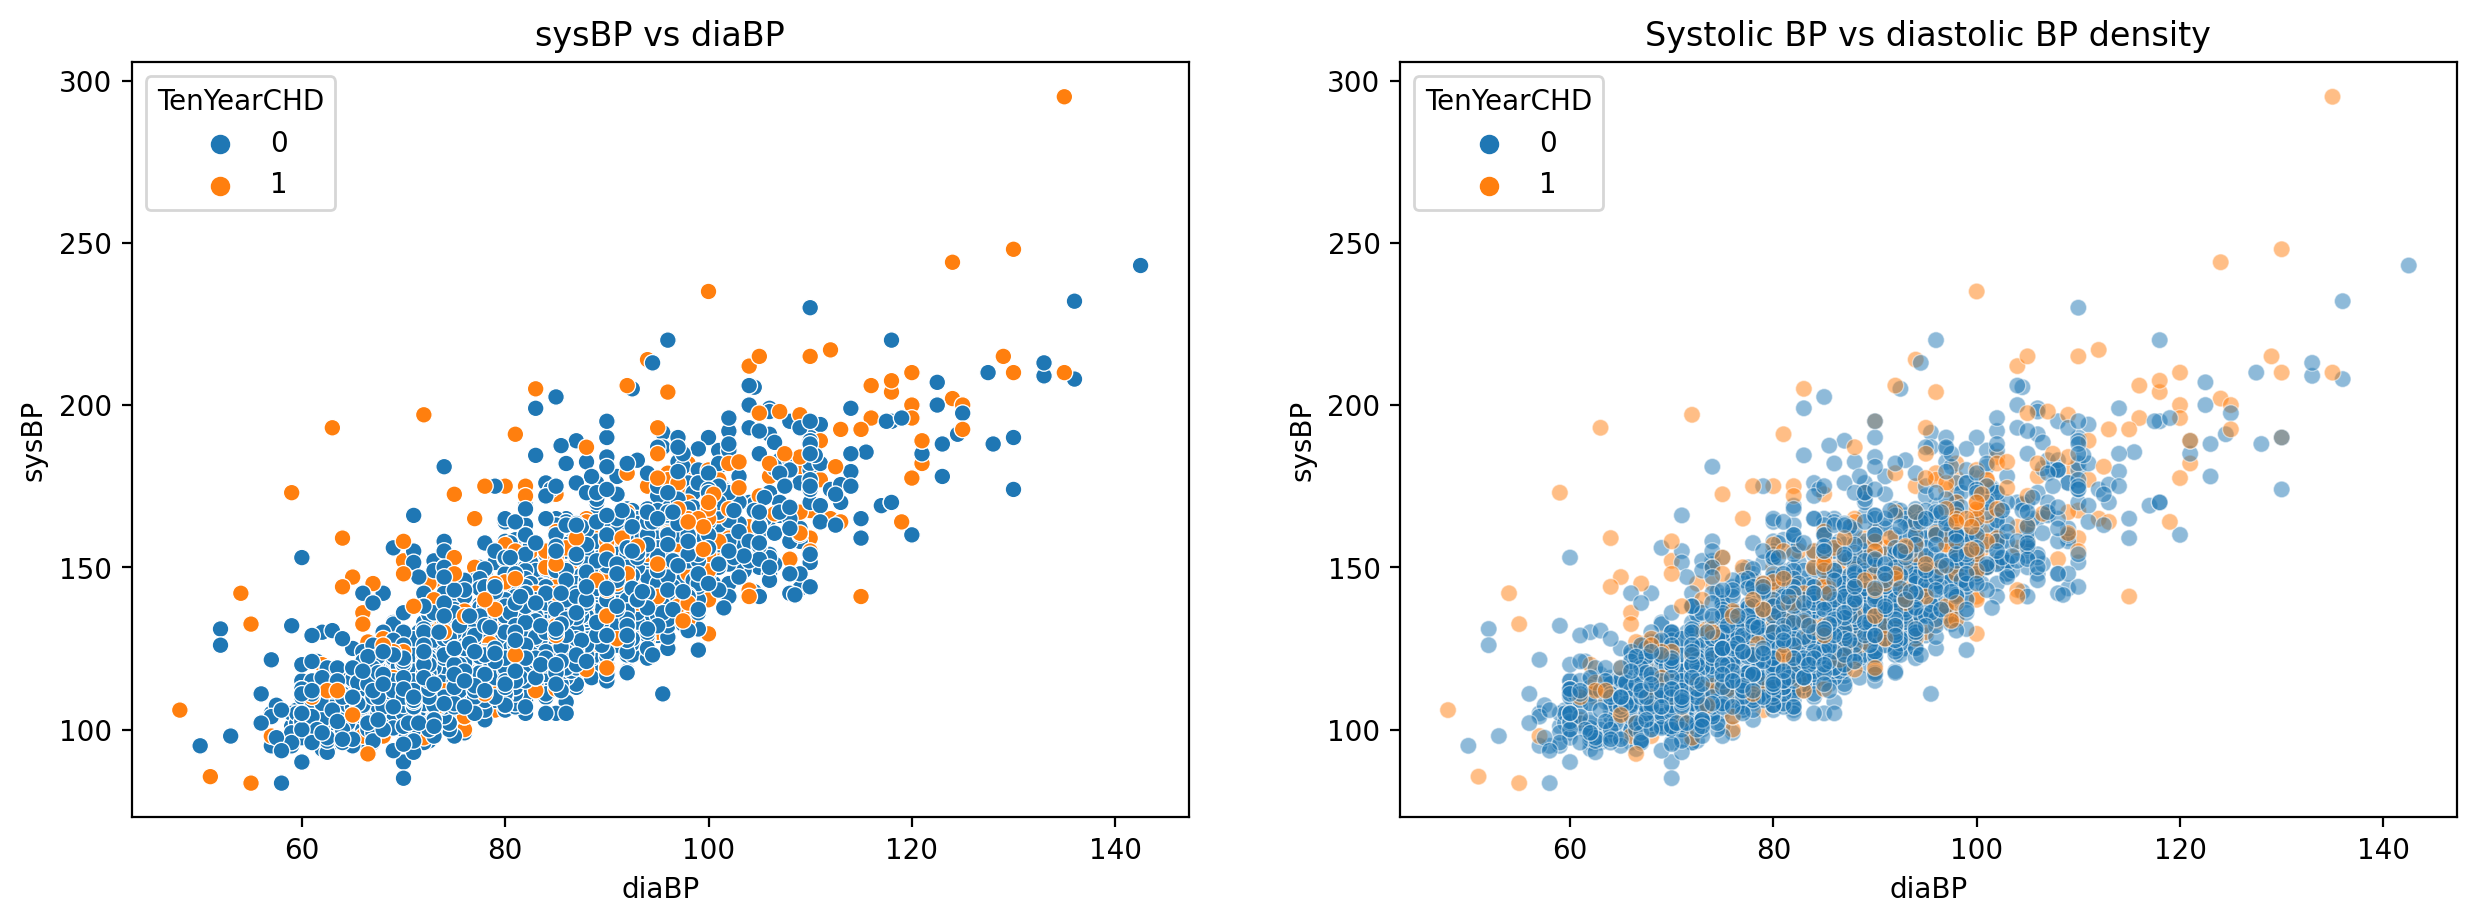

In [27]:
# Systolic BP and diastolic BP 
figure, ax=plt.subplots(nrows=1, ncols=2,figsize=(15,5), dpi=200)
ax[0].set_title('sysBP vs diaBP')
sns.scatterplot(data=df1, y='sysBP', x='diaBP', hue='TenYearCHD', ax=ax[0])
plt.title('Systolic BP vs diastolic BP density')
sns.scatterplot(data=df1, y='sysBP', x='diaBP', hue='TenYearCHD', ax=ax[1], alpha=0.5)

<AxesSubplot:title={'center':'Total Cholesterol vs BMI density'}, xlabel='BMI', ylabel='totChol'>

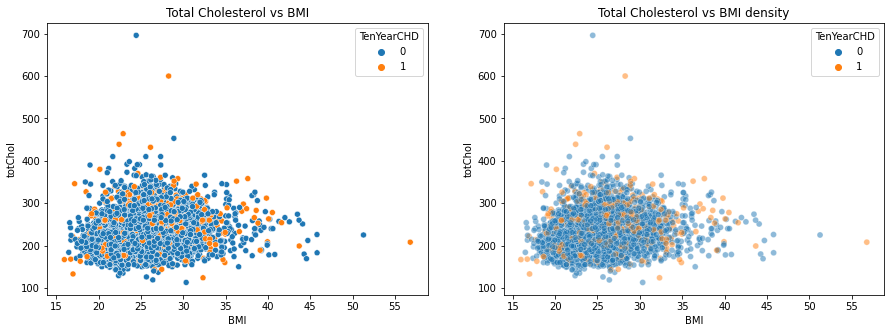

In [28]:
#Total cholesterol bs BMI
# plt.figure(dpi=100)
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].set_title('Total Cholesterol vs BMI')
sns.scatterplot(data=df1, y='totChol', x='BMI', hue='TenYearCHD', ax=ax[0])
ax[1].set_title('Total Cholesterol vs BMI density')
sns.scatterplot(data=df1, y='totChol', x='BMI', hue='TenYearCHD', alpha =0.5, ax=ax[1])

Text(0.5, 1.0, 'diaBP vs BMI density')

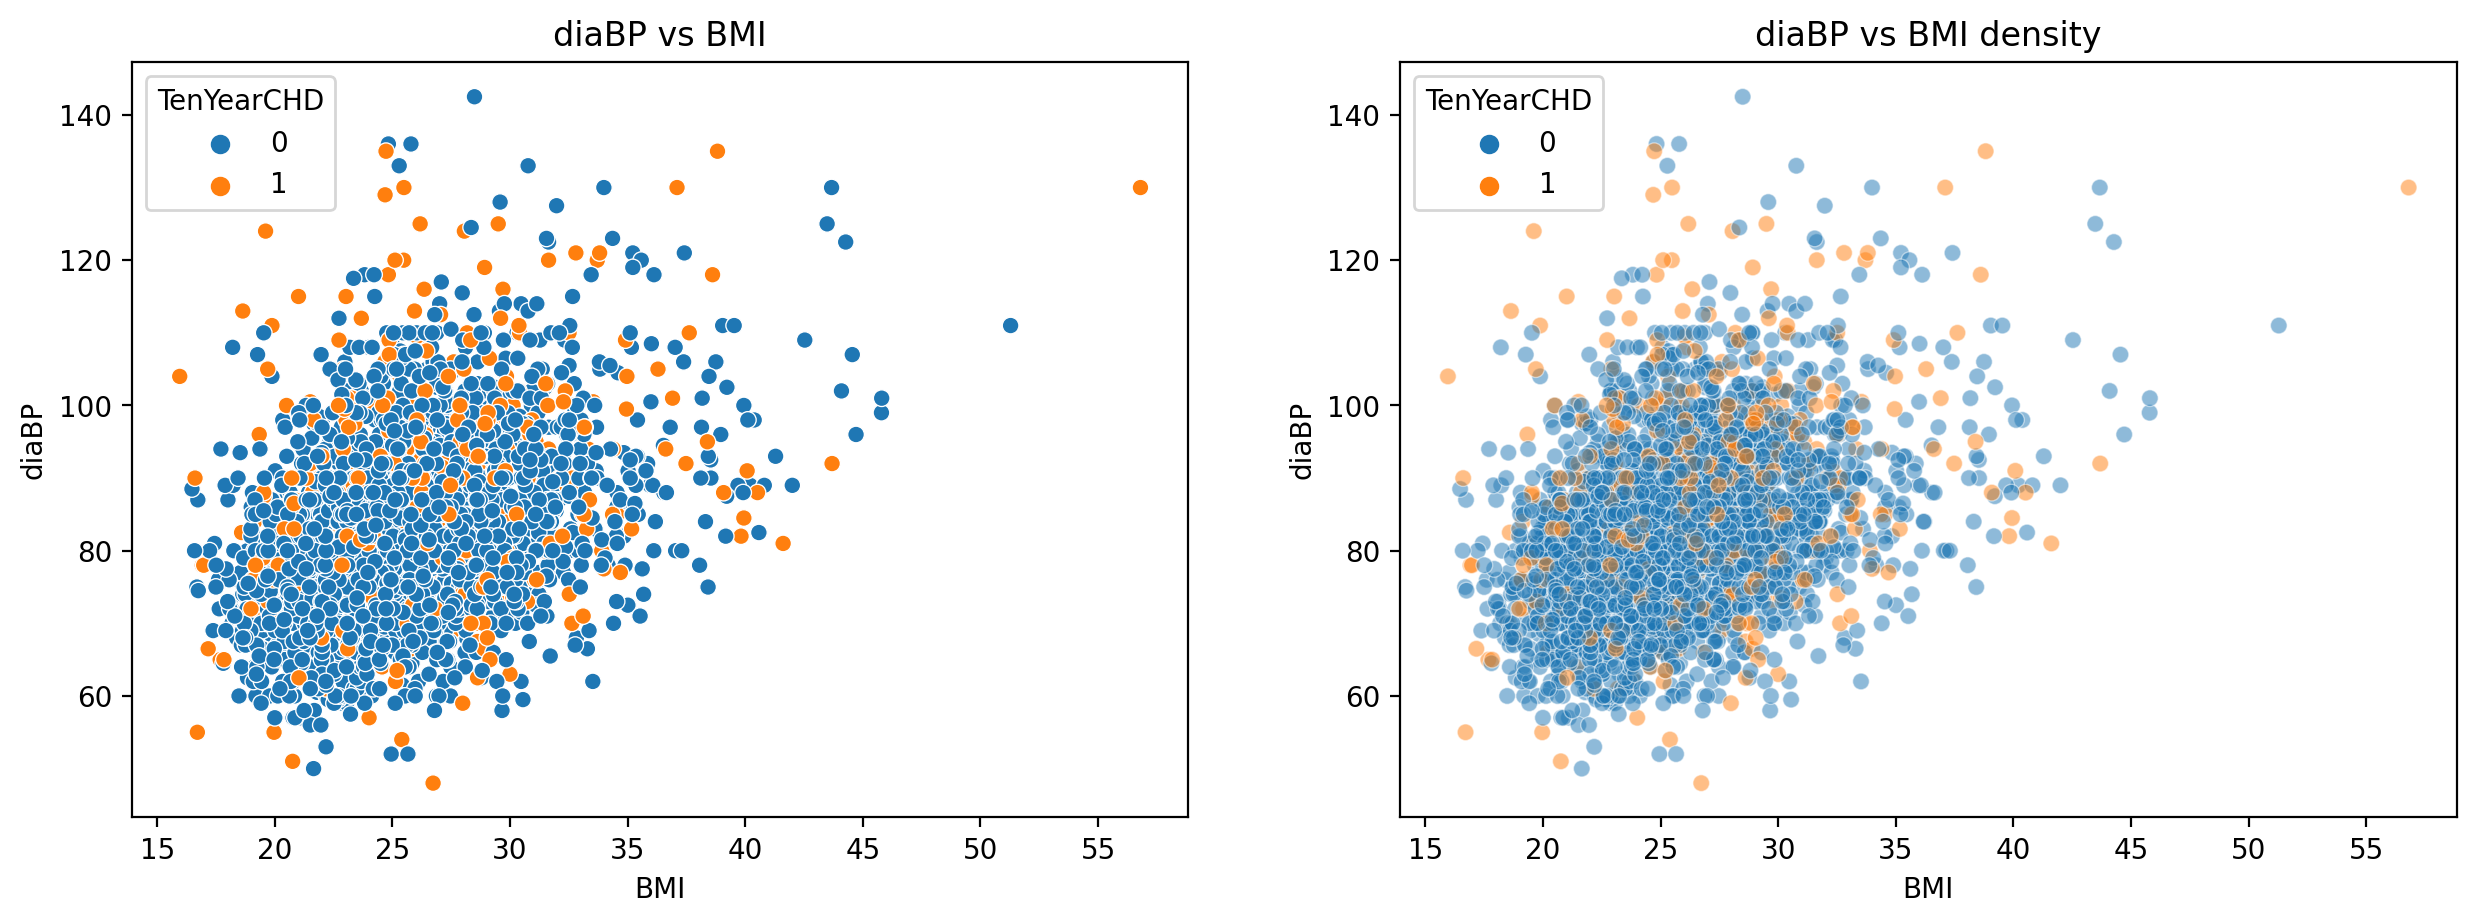

In [29]:
#Diastolic blood pressure vs BMI
figure,ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5), dpi=200)
sns.scatterplot(data=df1, y='diaBP', x='BMI', hue='TenYearCHD', ax=ax[0])
sns.scatterplot(data=df1, y='diaBP', x='BMI', hue='TenYearCHD', ax=ax[1], alpha=0.5)

ax[0].set_title('diaBP vs BMI')
ax[1].set_title('diaBP vs BMI density')

In [194]:
dum = pd.DataFrame(df1.corr()['TenYearCHD'].sort_values()[:-1])
dum

TenYearCHD
education         -0.052751
heartRate          0.020241
cigsPerDay         0.066778
BMI                0.066947
prevalentStroke    0.068627
BPMeds             0.088020
totChol            0.094306
diabetes           0.103681
diaBP              0.135979
glucose            0.138200
prevalentHyp       0.166544
sysBP              0.212703
age                0.224927

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'education'),
  Text(1, 0, 'heartRate'),
  Text(2, 0, 'cigsPerDay'),
  Text(3, 0, 'BMI'),
  Text(4, 0, 'prevalentStroke'),
  Text(5, 0, 'BPMeds'),
  Text(6, 0, 'totChol'),
  Text(7, 0, 'diabetes'),
  Text(8, 0, 'diaBP'),
  Text(9, 0, 'glucose'),
  Text(10, 0, 'prevalentHyp'),
  Text(11, 0, 'sysBP'),
  Text(12, 0, 'age')])

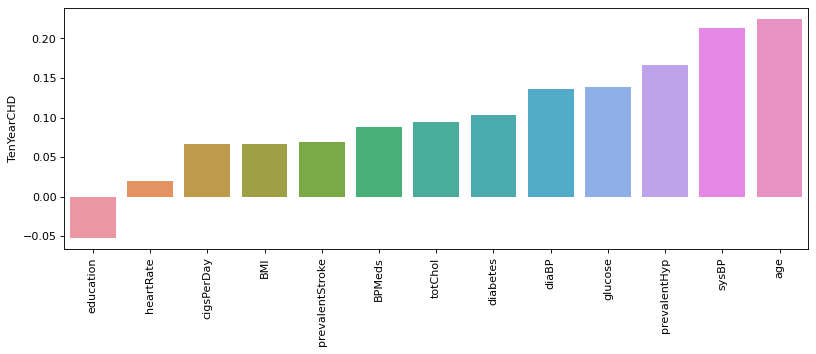

In [195]:
plt.figure(figsize=(12,4),dpi=80)
sns.barplot(data=dum, x=dum.index, y='TenYearCHD')
plt.xticks(rotation=90)

In [196]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [197]:
df1['glucose']

0        80.0
1        75.0
2        94.0
3        94.0
4        77.0
        ...  
3385    103.0
3386     84.0
3387     72.0
3388     85.0
3389     92.0
Name: glucose, Length: 3390, dtype: float64

## Removing outliers 

In [198]:
# Function to check the interquartile range for 
def calcIQR(st, data):
    q1 = data[st].quantile(0.25)
    q3 = data[st].quantile(0.85)
    iqr = q3-q1

    UL = q3 + (1.5 * iqr)
    LL = q1 - (1.5 * iqr)
    print('The IQR is ' ,iqr)
    print('The UL is ', UL)
    print('The LL is',LL)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'education'),
  Text(2, 0, 'cigsPerDay'),
  Text(3, 0, 'BPMeds'),
  Text(4, 0, 'prevalentStroke'),
  Text(5, 0, 'prevalentHyp'),
  Text(6, 0, 'diabetes'),
  Text(7, 0, 'totChol'),
  Text(8, 0, 'sysBP'),
  Text(9, 0, 'diaBP'),
  Text(10, 0, 'BMI'),
  Text(11, 0, 'heartRate'),
  Text(12, 0, 'glucose'),
  Text(13, 0, 'TenYearCHD')])

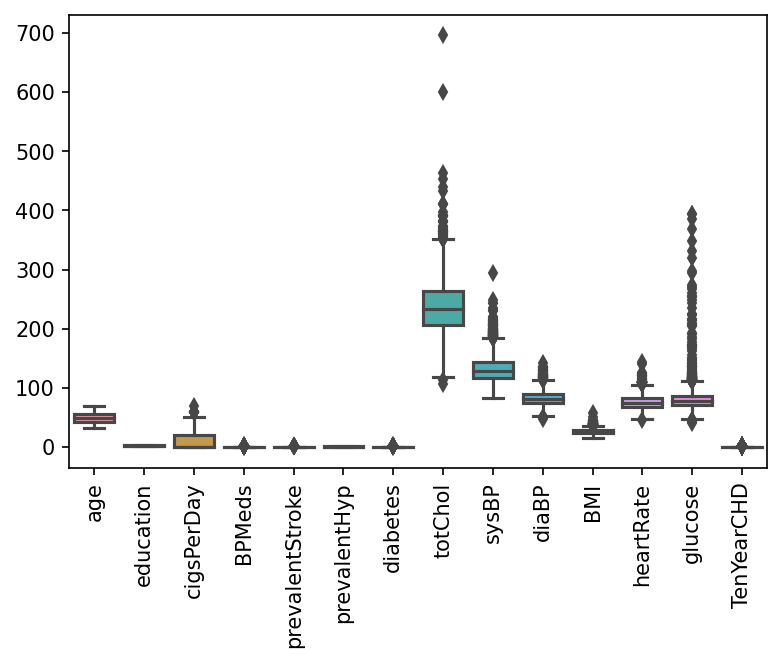

In [199]:
plt.figure(dpi=150)
sns.boxplot(data = df1)
plt.xticks(rotation=90)

In [200]:
calcIQR('totChol',df1)

The IQR is  74.34999999999991
The UL is  391.8749999999998
The LL is 94.47500000000014


Text(0.5, 1.0, 'Right skewed grpah ')

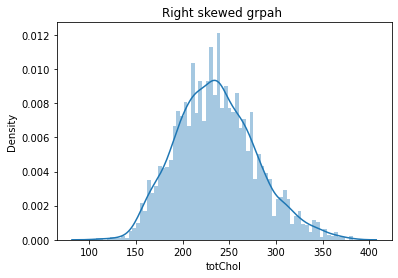

In [206]:
#Checking the skewness of the total cholesterol 
sns.distplot(df1['totChol'], bins=70)
plt.title('Right skewed grpah ')

In [203]:
# Removing the rows having cholesterol more than 390
df1 = df1[df1['totChol'] < 390]

Text(0.5, 1.0, 'Normally distributrd graph after removing outliers')

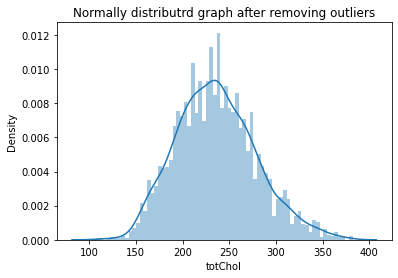

In [205]:
sns.distplot(df1['totChol'], bins=70)
plt.title('Normally distributrd graph after removing outliers')

Text(0.5, 1.0, 'Right skewed graph')

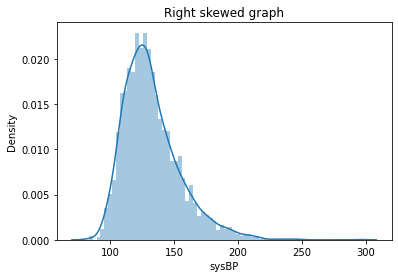

In [209]:
# Calculating the system BP
sns.distplot(df1['sysBP'], bins=70)
plt.title('Right skewed graph')

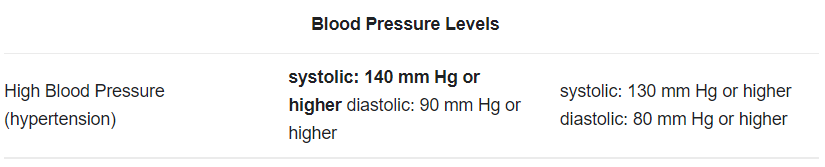

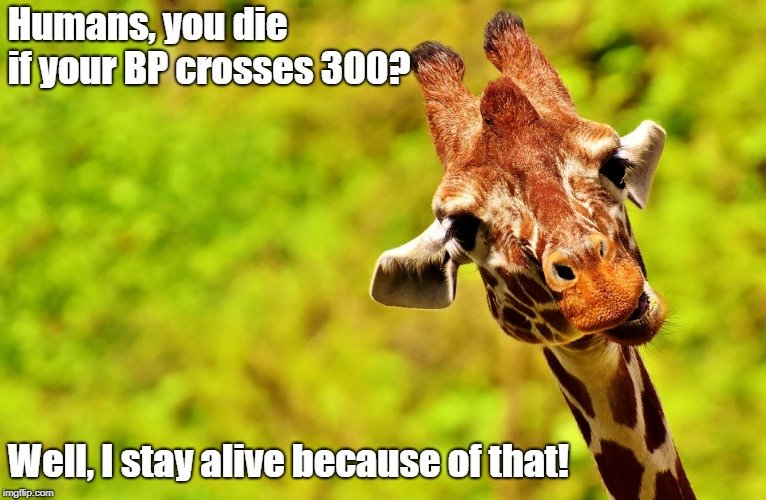

In [208]:
calcIQR('sysBP', df1)

The IQR is  37.5
The UL is  210.75
The LL is 60.75


In [210]:
# Removing some outliers 
df1 = df1[df1['sysBP']<250]

<AxesSubplot:xlabel='sysBP', ylabel='Density'>

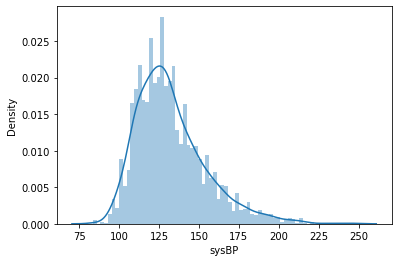

In [211]:
# Calculating the system BP 
sns.distplot(df1['sysBP'], bins=70) 

In [212]:
df1['glucose'].describe()

count    3061.000000
mean       82.057824
std        24.281470
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [213]:
df1[df1['glucose']>300]

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
312    46        2.0   F        YES        15.0     0.0                0   
1032   67        2.0   F         NO         0.0     1.0                0   
1156   47        1.0   F        YES         1.0     0.0                0   
1587   62        3.0   M         NO         0.0     0.0                0   
2188   62        3.0   F        YES        20.0     1.0                0   
2703   47        2.0   M        YES        20.0     0.0                0   
3042   62        1.0   F         NO         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
312              0         1    233.0  106.0   60.0  20.84       75.0   
1032             1         1    303.0  204.0   96.0  27.86       75.0   
1156             1         1    160.0  197.0  109.0  34.91       82.0   
1587             0         1    346.0  102.5   66.5  17.17       80.0   
2188             1         1    358.0  215.0  110.0  37.62      110.0   
2703             1         1    296.0  141.0   93.0  28.50       68.0   
3042             0         1    233.0  130.0   87.0  21.34       85.0   

      glucose  TenYearCHD  
312     348.0           0  
1032    394.0           1  
1156    320.0           1  
1587    394.0           1  
2188    368.0           1  
2703    332.0           1  
3042    386.0           0

## Imputing Null values

In [214]:
df1['glucose'] = df1['glucose'].fillna(df1['glucose'].median())

In [215]:
df1.isnull().sum()

age                 0
education          85
sex                 0
is_smoking          0
cigsPerDay         22
BPMeds             42
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                14
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [216]:
df1 = df1.dropna(axis=0)

In [217]:
df1.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [218]:
df1['TenYearCHD'].value_counts()

0    2705
1     470
Name: TenYearCHD, dtype: int64

In [227]:
# Checking the labeled data distribution 
sns.countplot(data=df1, x='TenYearCHD')
plt.title('Imbalanced dataset ')

Text(0.5, 1.0, 'Imbalanced dataset ')

Here, we have very imbalanced dataset so we shall try to resolve it first

### What is imbalanced data?

- Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations. We can better understand it with an example.


#### Methods to handle imbalanced dataset

- Resampling
- SMOTE (Synthetic Minority Oversampling Technique)
- BalancedBaggingClassifier

We shall use Resampling Technique here to resample our imbalanced dataset

In [228]:
df1.duplicated().sum()

0

In [229]:
from sklearn.utils import resample

In [230]:
# Resampling the minority classs as this strategy can be changed anytime 
# Creating two data frames for majority and minority class

df1_maj = df1[(df1['TenYearCHD'] == 0)]
df1_min = df1[(df1['TenYearCHD'] == 1)]

# Upsampling the minority class

df1_min_unsampled = resample(df1_min,
                            replace=True,
                            n_samples=2705,
                            random_state=101)

#Combining the majority to the minority class
df1_up = pd.concat([df1_min_unsampled, df1_maj]) 

In [231]:
df1_up.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
2551   48        1.0   M        YES        35.0     0.0                0   
80     40        4.0   M         NO         0.0     0.0                0   
2436   53        2.0   M        YES        20.0     0.0                0   
2355   57        3.0   M         NO         0.0     0.0                0   
490    49        1.0   F        YES         5.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
2551             0         0    263.0  132.0   91.0  40.08       90.0   
80               0         0    161.0  122.0   85.0  30.80       75.0   
2436             1         0    266.0  163.0  105.0  28.04       90.0   
2355             0         0    213.0  141.0   90.0  30.77       60.0   
490              0         0    350.0  135.0   86.5  25.56       75.0   

      glucose  TenYearCHD  
2551     91.0           1  
80       85.0           1  
2436     79.0           1  
2355     77.0           1  
490      83.0           1

Text(0.5, 1.0, 'Balanced dataset after resampling ')

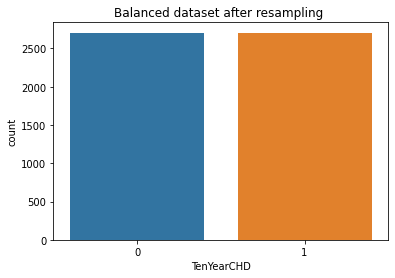

In [233]:
# Checking the labeled data distribution 
sns.countplot(data=df1_up, x='TenYearCHD')
plt.title('Balanced dataset after resampling ')

In [234]:
df1_up['TenYearCHD'].value_counts()

0    2705
1    2705
Name: TenYearCHD, dtype: int64

In [235]:
df1_up[df1_up.duplicated()]

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
490    49        1.0   F        YES         5.0     0.0                0   
322    56        1.0   F        YES        40.0     0.0                0   
2725   50        2.0   M         NO         0.0     0.0                0   
2894   52        1.0   M        YES        20.0     0.0                0   
3155   63        1.0   F         NO         0.0     0.0                0   
...   ...        ...  ..        ...         ...     ...              ...   
1715   65        1.0   M        YES        20.0     1.0                0   
2252   60        4.0   M        YES        30.0     0.0                0   
3140   51        2.0   F        YES        20.0     0.0                0   
400    58        2.0   F         NO         0.0     0.0                0   
1247   52        3.0   F        YES         9.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
490              0         0    350.0  135.0   86.5  25.56       75.0   
322              1         0    214.0  147.0   65.0  17.68      110.0   
2725             0         0    296.0  129.0   85.0  25.86       56.0   
2894             1         0    283.0  145.0   79.0  30.12       72.0   
3155             1         0    275.0  148.0   75.0  28.87       70.0   
...            ...       ...      ...    ...    ...    ...        ...   
1715             1         0    246.0  179.0   96.0  19.34       95.0   
2252             0         0    243.0  126.0   79.0  28.57       80.0   
3140             0         0    326.0  112.0   83.0  20.82      104.0   
400              1         1    240.0  150.0   80.0  26.45       66.0   
1247             0         0    249.0  112.0   75.0  22.54       72.0   

      glucose  TenYearCHD  
490      83.0           1  
322      87.0           1  
2725    106.0           1  
2894     78.0           1  
3155     83.0           1  
...       ...         ...  
1715     76.0           1  
2252     65.0           1  
3140     70.0           1  
400     255.0           1  
1247     71.0           1  

[2237 rows x 16 columns]

#### Now that we have balanced dataset

In [236]:
df1_up.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
2551   48        1.0   M        YES        35.0     0.0                0   
80     40        4.0   M         NO         0.0     0.0                0   
2436   53        2.0   M        YES        20.0     0.0                0   
2355   57        3.0   M         NO         0.0     0.0                0   
490    49        1.0   F        YES         5.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
2551             0         0    263.0  132.0   91.0  40.08       90.0   
80               0         0    161.0  122.0   85.0  30.80       75.0   
2436             1         0    266.0  163.0  105.0  28.04       90.0   
2355             0         0    213.0  141.0   90.0  30.77       60.0   
490              0         0    350.0  135.0   86.5  25.56       75.0   

      glucose  TenYearCHD  
2551     91.0           1  
80       85.0           1  
2436     79.0           1  
2355     77.0           1  
490      83.0           1

## Train | Test | Split and Scaling 

In [237]:
# Importing the train test split
from sklearn.model_selection import train_test_split

In [238]:
X = df1_up.drop('TenYearCHD', axis=1)
y = df1_up['TenYearCHD']

In [239]:
# Converting to Dummies
X = pd.get_dummies(X, drop_first=True)

In [240]:
X.head()

age  education  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
2551   48        1.0        35.0     0.0                0             0   
80     40        4.0         0.0     0.0                0             0   
2436   53        2.0        20.0     0.0                0             1   
2355   57        3.0         0.0     0.0                0             0   
490    49        1.0         5.0     0.0                0             0   

      diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  sex_M  \
2551         0    263.0  132.0   91.0  40.08       90.0     91.0      1   
80           0    161.0  122.0   85.0  30.80       75.0     85.0      1   
2436         0    266.0  163.0  105.0  28.04       90.0     79.0      1   
2355         0    213.0  141.0   90.0  30.77       60.0     77.0      1   
490          0    350.0  135.0   86.5  25.56       75.0     83.0      0   

      is_smoking_YES  
2551               1  
80                 0  
2436               1  
2355               0  
490                1

In [243]:
#Let's drop the umwanted rows like smoking_N and Sex_F
# X = X.drop(['is_smoking_NO','sex_F'], axis=1)

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [245]:
# Scaling the data 
from sklearn.preprocessing import StandardScaler

In [246]:
scaler = StandardScaler()

In [247]:
X_train_scaled = scaler.fit_transform(X_train)

In [248]:
X_test_scaled = scaler.transform(X_test)

# Model predicting function

In [249]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [250]:
def predict(model, X_train, y_train, X_test, y_test):
    #Fitting the data
    model.fit(X_train, y_train)
    
    # Predicting on test set
    preds = model.predict(X_test)
    
    # Classification Report
    print(classification_report(y_test, preds))  
    
#     print('*******************************************************')
    
    # Plot confusion matrix
    plot_confusion_matrix(model, X_test, y_test)
    print('*******************************************************')
    
    #Calculate Accuracy
    print('The accuracy :',accuracy_score(y_test, preds)*100)
    print('*******************************************************')
    
    #Plot precision recall curve
    plot_precision_recall_curve(model, X_test, y_test)
#     print('*******************************************************')
    
    #Plot ROC curve
    plot_roc_curve(model, X_test, y_test)

In [282]:
def result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    # Predicting on test set
    preds = model.predict(X_test)
    
    return preds

## Logistic Regression model

In [251]:
from sklearn.linear_model import LogisticRegression 

In [252]:
log_model = LogisticRegression()

In [283]:
lr_model = result(log_model, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       805
           1       0.67      0.66      0.66       818

    accuracy                           0.66      1623
   macro avg       0.66      0.66      0.66      1623
weighted avg       0.66      0.66      0.66      1623

*******************************************************
The accuracy : 66.05052372150338
*******************************************************


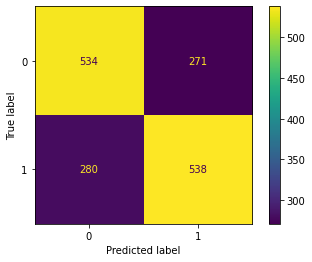

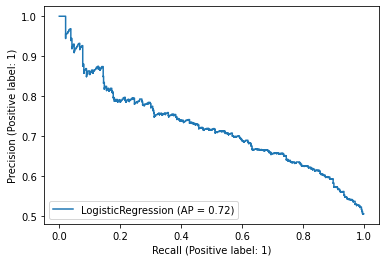

In [253]:
# Calling the predict function 
predict(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

## K Nearest Neighbour (KNN)

In [254]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [255]:
knn = KNeighborsClassifier()
scaler = StandardScaler()

In [256]:
operations = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(operations)

In [257]:
k_values = list(range(1,30))

In [258]:
param_grid = {'knn__n_neighbors' : k_values}

In [259]:
grid_model = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [284]:
knn_model = result(grid_model, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       805
           1       0.87      0.99      0.92       818

    accuracy                           0.92      1623
   macro avg       0.93      0.92      0.92      1623
weighted avg       0.93      0.92      0.92      1623

*******************************************************
The accuracy : 91.74368453481208
*******************************************************


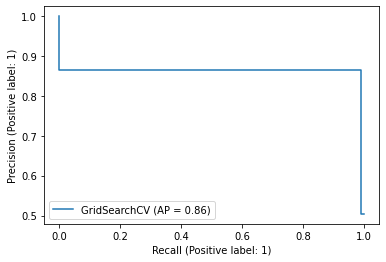

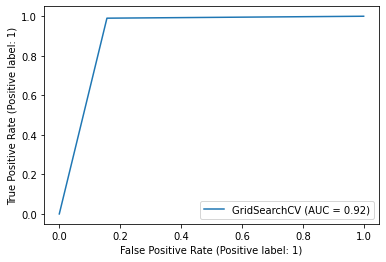

In [260]:
predict(grid_model, X_train, y_train, X_test, y_test)

In [261]:
grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [262]:
grid_model.cv_results_['mean_test_score']

array([0.8938474 , 0.85450414, 0.80090309, 0.77423136, 0.75178614,
       0.73224748, 0.71217694, 0.71349411, 0.70187799, 0.70583751,
       0.69817848, 0.6902542 , 0.68735217, 0.69156928, 0.69526809,
       0.69394987, 0.69580032, 0.69500667, 0.68998965, 0.69210012,
       0.69289795, 0.68682586, 0.68708344, 0.68048121, 0.67704764,
       0.6791602 , 0.67995211, 0.67572803, 0.67652133])

Text(0.5, 1.0, 'Elbow method to find the best K value')

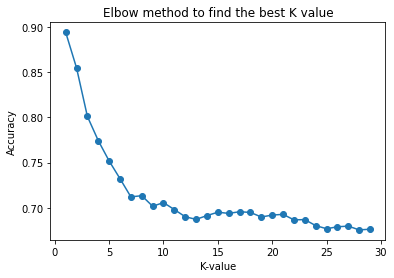

In [277]:
scores = grid_model.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K-value")  
plt.ylabel("Accuracy")
plt.title('Elbow method to find the best K value')

- From the above elbow method we can see that the best K value is 1 from the list of 1-30
- Hence the model performed best at k=1.
- We also observed from the taining of the data that the accuracy is 91% which is very effective model.
- The AUC score of 0.92 is also good as it is very close 1

## Decision Tree

In [264]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [287]:
dct = DecisionTreeClassifier()
dct_model = result(log_model, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       805
           1       0.86      0.99      0.92       818

    accuracy                           0.91      1623
   macro avg       0.92      0.91      0.91      1623
weighted avg       0.92      0.91      0.91      1623

*******************************************************
The accuracy : 91.37399876771411
*******************************************************


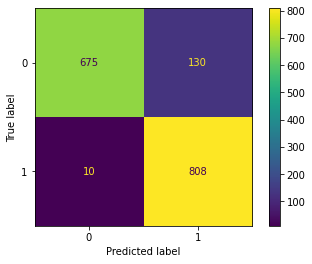

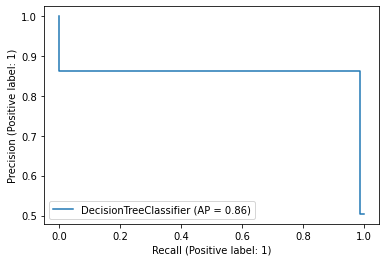

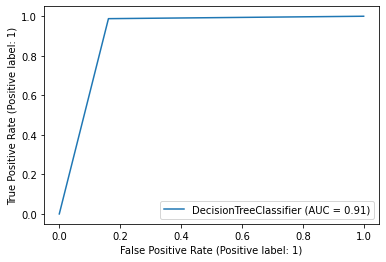

In [286]:
predict(dct, X_train_scaled, y_train, X_test_scaled, y_test)

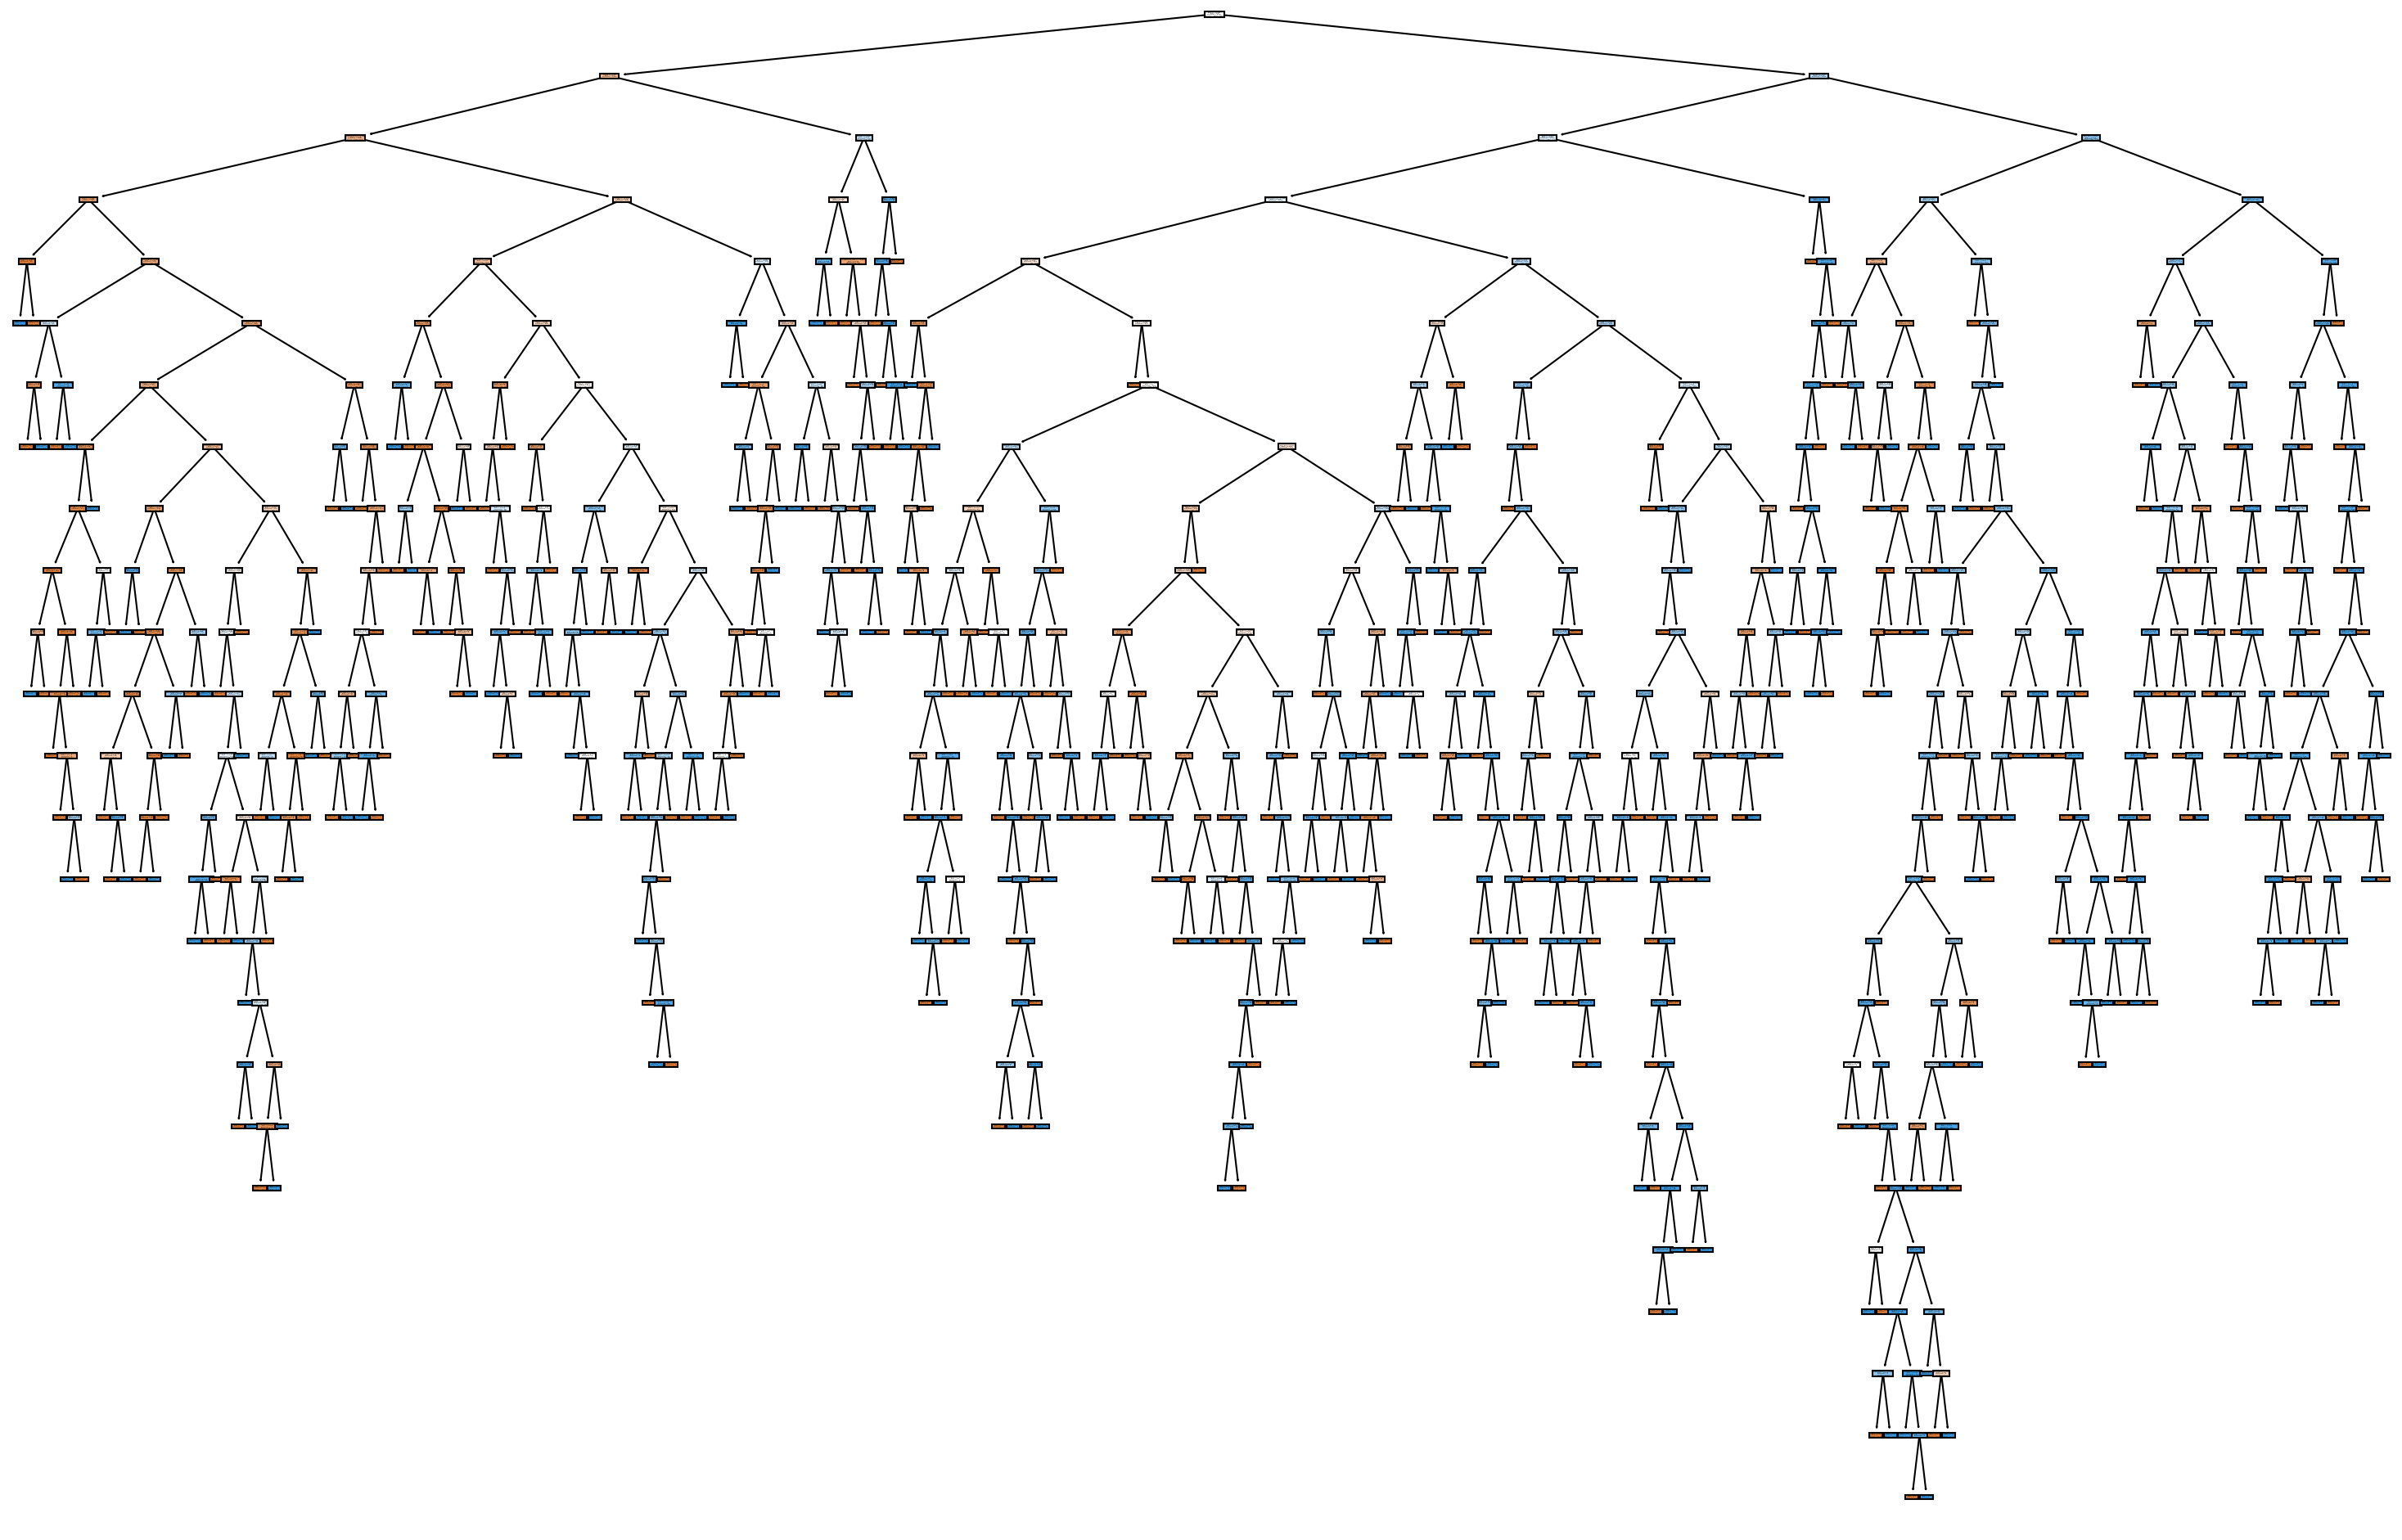

In [266]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dct,filled=True,feature_names=X.columns);

## Random Forest

In [267]:
from sklearn.ensemble import RandomForestClassifier

In [268]:
rfc = RandomForestClassifier()

In [289]:
rfc_model = result(rfc, X_train_scaled, y_train, X_test_scaled, y_test)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       805
           1       0.95      0.99      0.97       818

    accuracy                           0.97      1623
   macro avg       0.97      0.97      0.97      1623
weighted avg       0.97      0.97      0.97      1623

*******************************************************
The accuracy : 96.91928527418361
*******************************************************


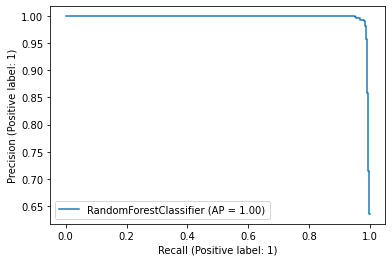

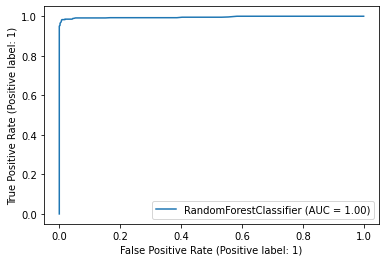

In [290]:
predict(rfc, X_train_scaled, y_train, X_test_scaled, y_test)

# XGBoost

In [270]:
from xgboost import XGBClassifier

In [271]:
xgb = XGBClassifier()

In [291]:
xgb_model = result(xgb, X_train_scaled, y_train, X_test_scaled, y_test)

[13:42:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[13:42:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       805
           1       0.89      0.98      0.94       818

    accuracy                           0.93      1623
   macro avg       0.94      0.93      0.93      1623
weighted avg       0.94      0.93      0.93      1623

*******************************************************
The accuracy : 93.28404189772027
*******************************************************


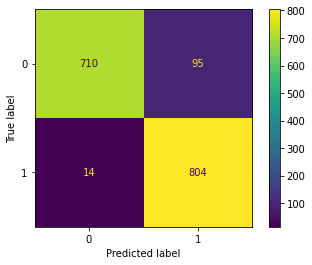

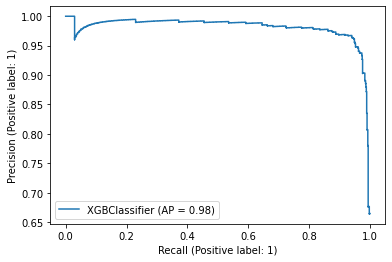

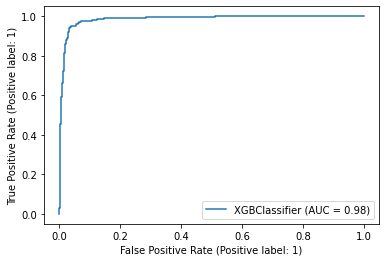

In [292]:
predict(xgb, X_train_scaled, y_train, X_test_scaled, y_test)

In [273]:
x = np.random.rand(4, 5)

y = np.sum(x, axis=1)

In [274]:
y.shape

(4,)

## Conclusion

In [293]:
names = ['Logistic Regression','KNN','Decison Tree','Random Forest', 'XGBoost']
proba_list = [lr_model, knn_model, dct_model, rfc_model, xgb_model]

<Figure size 3000x1200 with 0 Axes>

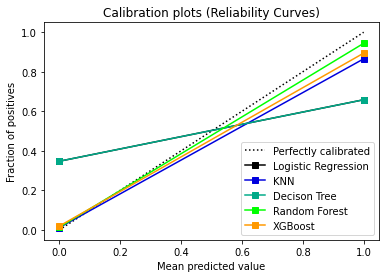

In [297]:
plt.figure(figsize=(15,6),dpi=200)
skplt.metrics.plot_calibration_curve(y_test, proba_list,names)
plt.show()

- Random Forest has performed the best with the accuracy of 96%.
- The other reason is the AUC score for Random Forest is 1 which is considerd as the best classifier.
- The Logistic Regression model performed the worst among all as the accuracy score of 66%.
- XGBoost also performed good followed after Random Forest with the accuracy of 92% and 0.92 AUC score.